# **Proceso de Preparación y EDA PriceHouse**

**Responsables**
* Rafael
* Angela
* Oscar


**Tabla de Contenido**

* 1) Librerias
* 2) Importación Datos
* 3) Depuración de Datos
* 4) Pipeline Imputación y Estandarización de Variables
* 5) Análisis Univariado del Target (PriceHouse)
* 6) Análisis de Correlación entre Features
* 7) Selección de Features

# **1) Librerias**

In [1]:
## Tratamiento de datos
import numpy as np
import pandas as pd
## Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

## Modelado y preparación
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.pipeline  import Pipeline 
from sklearn.compose import ColumnTransformer
import statsmodels.api as sms
from scipy import stats # Para test estadiscos
from statsmodels.stats.weightstats import DescrStatsW
import time

from tqdm import tqdm

## Seleccionar features
from sklearn.feature_selection import SelectKBest # seleccionar mejores variables predictivas
from sklearn.impute import SimpleImputer # Imputacion simple, por mediana y moda
from sklearn.preprocessing import OneHotEncoder ## Variables Categoricas

## Funciones Propias
import utils 

## Evitar notación cientifica 

pd.set_option("display.float_format", lambda x: '%.3f' % x)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_rows", 100)

import warnings
warnings.filterwarnings("ignore")

# **2) Importación Datos**

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Oscar19922017/HousePriceKaggle/main/train.csv")

In [3]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


**Diccionario de la Base de Datos**

Campos de información
Aquí hay una versión breve de lo que encontrará en el archivo de descripción de datos.

* SalePrice : el precio de venta de la propiedad en dólares. Esta es la variable objetivo que está tratando de predecir.
* MSSubClass : la clase de construcción
* MSZoning : la clasificación general de zonificación
* LotFrontage : pies lineales de calle conectados a la propiedad
* LotArea : Tamaño del lote en pies cuadrados
* Calle : Tipo de acceso por carretera
* Callejón : Tipo de acceso al callejón
* LotShape : forma general de la propiedad
* LandContour : Planitud de la propiedad
* Utilidades : tipo de utilidades disponibles
* LotConfig : configuración del lote
* LandSlope : Pendiente de la propiedad
* Vecindario : ubicaciones físicas dentro de los límites de la ciudad de Ames
* Condition1 : Proximidad a la carretera principal o al ferrocarril
* Condición 2 : Proximidad a la carretera principal o al ferrocarril (si hay un segundo)
* BldgType : Tipo de vivienda
* HouseStyle : estilo de vivienda
* OverallQual : Material general y calidad de acabado.
* OverallCond : Calificación de estado general
* Año de construcción: fecha de construcción original
* YearRemodAdd : fecha de remodelación
* RoofStyle : Tipo de techo
* RoofMatl : material del techo
* Exterior1st : Revestimiento exterior de la casa
* Exterior2nd : Revestimiento exterior de la casa (si hay más de un material)
* MasVnrType : tipo de chapa de mampostería
* MasVnrArea : Área de revestimiento de mampostería en pies cuadrados
* ExterQual : Calidad del material exterior
* ExterCond : Estado actual del material en el exterior
* Fundación : Tipo de fundación
* BsmtQual : Altura del sótano
* BsmtCond : Estado general del sótano
* BsmtExposure : Paredes de sótano a nivel de jardín o de salida
* BsmtFinType1 : Calidad del área terminada del sótano
* BsmtFinSF1 : pies cuadrados terminados tipo 1
* BsmtFinType2 : Calidad de la segunda área terminada (si está presente)
* BsmtFinSF2 : pies cuadrados con acabado tipo 2
* BsmtUnfSF : pies cuadrados sin terminar de área del sótano
* TotalBsmtSF : Total de pies cuadrados de área del sótano
* Calefacción : Tipo de calefacción
* Calefacción QC : calidad y estado de la calefacción
* CentralAir : aire acondicionado central
* Eléctrico : sistema eléctrico
* 1stFlrSF : pies cuadrados del primer piso
* 2ndFlrSF : pies cuadrados del segundo piso
* LowQualFinSF : pies cuadrados con acabado de baja calidad (todos los pisos)
* GrLivArea : pies cuadrados de área habitable sobre el nivel (suelo)
* BsmtFullBath : Baños completos en el sótano
* BsmtHalfBath : Medios baños del sótano
* FullBath : baños completos sobre rasante
* HalfBath : Medios baños sobre el nivel del suelo
* Dormitorio : número de dormitorios sobre el nivel del sótano
* Cocina : Número de cocinas
* KitchenQual : calidad de la cocina
* TotRmsAbvGrd : Total de habitaciones sobre rasante (no incluye baños)
* Funcional : clasificación de funcionalidad del hogar
* Chimeneas : Número de chimeneas
* FireplaceQu : Calidad de chimenea
* GarageType : Ubicación del garaje
* GarageYrBlt : año en que se construyó el garaje
* GarageFinish : Acabado interior del garaje
* GarageCars : Tamaño del garaje en capacidad de automóvil
* GarageArea : Tamaño del garaje en pies cuadrados
* GarageQual : Calidad de garaje
* GarageCond : Estado del garaje
* PavedDrive : entrada pavimentada
* WoodDeckSF : Área de la plataforma de madera en pies cuadrados
* OpenPorchSF : Área de porche abierto en pies cuadrados
* Porche cerrado : área de porche cerrado en pies cuadrados
* 3SsnPorch : área de porche de tres estaciones en pies cuadrados
* ScreenPorch : Área del porche de la pantalla en pies cuadrados
* PoolArea : Área de la piscina en pies cuadrados
* PoolQC : Calidad de la piscina
* Valla : calidad de la valla
* MiscFeature : característica miscelánea no cubierta en otras categorías
* MiscVal : $ Valor de la función miscelánea
* MoSold : Mes vendido
* YrSold : año vendido
* SaleType : Tipo de venta
* SaleCondition : Condición de venta

# **3) Depuración**
* 3.1 Mapear Variables
* 3.2 Identificación Variables Constantes
* 3.3 Valores con Alto Porcentaje de Nulos
* 3.4 Recodificación de Variables

## **3.1 Mapear Variables**

In [4]:
help(utils.mapeo_de_variables)

Help on function mapeo_de_variables in module utils:

mapeo_de_variables(df: pandas.core.frame.DataFrame) -> pandas.core.frame.DataFrame
    genera una tabla donde muestra, para cada variable en un dataframe, su número de nulos, tipo, valores únicos y porcentaje de nulos



In [5]:
mapeo1,dimension=utils.mapeo_de_variables(df)
print(dimension)

(1460, 81)


In [6]:
mapeo1

,Variable,Nulos,Tipo Variable,Valores Unicos,Unicos,Porcentaje Nulos
72,PoolQC,1453,object,3,"[Ex, Fa, Gd]",99.521
74,MiscFeature,1406,object,4,"[Shed, Gar2, Othr, TenC]",96.301
6,Alley,1369,object,2,"[Grvl, Pave]",93.767
73,Fence,1179,object,4,"[MnPrv, GdWo, GdPrv, MnWw]",80.753
57,FireplaceQu,690,object,5,"[TA, Gd, Fa, Ex, Po]",47.260
3,LotFrontage,259,float64,110,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, 51....",17.740
59,GarageYrBlt,81,float64,97,"[2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993....",5.548
64,GarageCond,81,object,5,"[TA, Fa, Gd, Po, Ex]",5.548
58,GarageType,81,object,6,"[Attchd, Detchd, BuiltIn, CarPort, Basment, 2T...",5.548
60,GarageFinish,81,object,3,"[RFn, Unf, Fin]",5.548


# **3.2 Identificación Variables Constantes**

In [7]:
help(utils.identifica_la_lista_de_variables_constantes_y_las_elimina)

Help on function identifica_la_lista_de_variables_constantes_y_las_elimina in module utils:

identifica_la_lista_de_variables_constantes_y_las_elimina(df: pandas.core.frame.DataFrame, tabla_de_variables: pandas.core.frame.DataFrame) -> pandas.core.frame.DataFrame
    Elimina las columnas de un dataframe que tienen un único valor y retorna el nombre de esas columnas



In [8]:
df,constantes=utils.identifica_la_lista_de_variables_constantes_y_las_elimina(df,mapeo1)

In [9]:
print(f'Cantidad de Variables constantes eliminadas: {len(constantes)} y son : {constantes}')

Cantidad de Variables constantes eliminadas: 0 y son : Series([], Name: Variable, dtype: object)


In [10]:
print(f'Dimensión Nueva: {df.shape}')

Dimensión Nueva: (1460, 81)


## **3.3 Valores con Alto Porcentaje de Nulos**

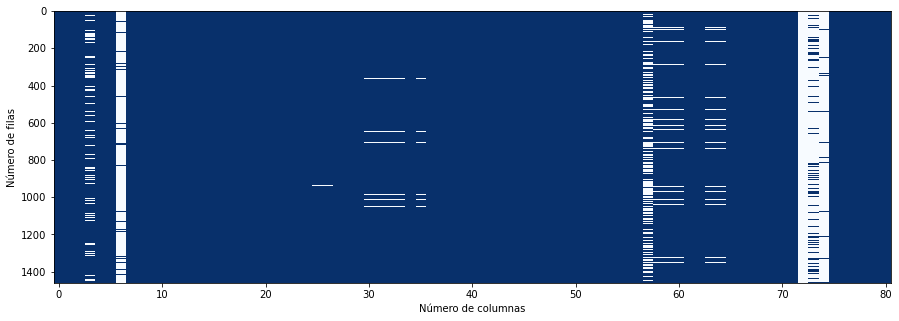

In [11]:
plt.figure(figsize=(15,5))
plt.imshow(df.isna(), aspect="auto",  interpolation="nearest", cmap="Blues_r")
plt.xlabel("Número de columnas")
plt.ylabel("Número de filas")
plt.show()

In [12]:
help(utils.identifica_la_lista_de_variables_con_altos_nulos)

Help on function identifica_la_lista_de_variables_con_altos_nulos in module utils:

identifica_la_lista_de_variables_con_altos_nulos(df: pandas.core.frame.DataFrame, tabla_de_variables: pandas.core.frame.DataFrame, las_variables_con_valores_unicos: pandas.core.frame.DataFrame, por=80) -> pandas.core.frame.DataFrame
    Elimina las columnas de un dataframe que tienen mas de 80% valores nulos --y que no sean constantes-- y retorna el nombre de esas columnas



In [13]:
df,nulas=utils.identifica_la_lista_de_variables_con_altos_nulos(df,mapeo1,constantes,50)

In [14]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500


In [15]:
print(f'Cantidad de nulas: {len(nulas)} y son : {nulas}')

Cantidad de nulas: 4 y son : ['MiscFeature', 'Fence', 'PoolQC', 'Alley']


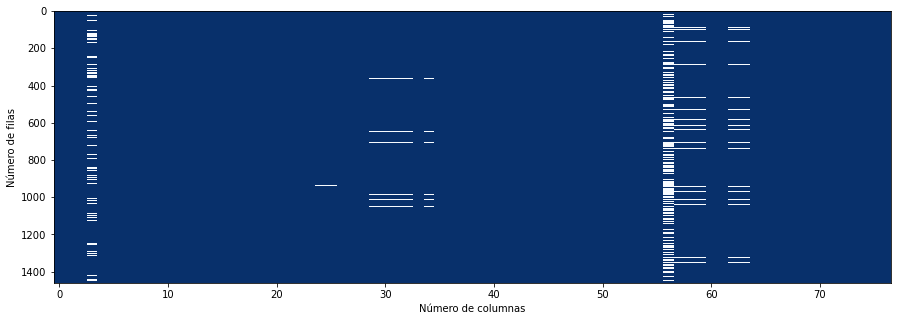

In [16]:
plt.figure(figsize=(15,5))
plt.imshow(df.isna(), aspect="auto",  interpolation="nearest", cmap="Blues_r")
plt.xlabel("Número de columnas")
plt.ylabel("Número de filas")
plt.show()

## **3.4 Recodificación de Variables**

In [17]:
Mapeo2,dimension=utils.mapeo_de_variables(df)
Mapeo2

,Variable,Nulos,Tipo Variable,Valores Unicos,Unicos,Porcentaje Nulos
56,FireplaceQu,690,object,5,"[TA, Gd, Fa, Ex, Po]",47.260
3,LotFrontage,259,float64,110,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, 51....",17.740
57,GarageType,81,object,6,"[Attchd, Detchd, BuiltIn, CarPort, Basment, 2T...",5.548
58,GarageYrBlt,81,float64,97,"[2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993....",5.548
59,GarageFinish,81,object,3,"[RFn, Unf, Fin]",5.548
62,GarageQual,81,object,5,"[TA, Fa, Gd, Ex, Po]",5.548
63,GarageCond,81,object,5,"[TA, Fa, Gd, Po, Ex]",5.548
31,BsmtExposure,38,object,4,"[No, Gd, Mn, Av]",2.603
34,BsmtFinType2,38,object,6,"[Unf, BLQ, ALQ, Rec, LwQ, GLQ]",2.603
29,BsmtQual,37,object,4,"[Gd, TA, Ex, Fa]",2.534


In [18]:
help(utils.recodificacion_variables)

Help on function recodificacion_variables in module utils:

recodificacion_variables(df, df_tmp)



In [19]:
df=utils.recodificacion_variables(df,Mapeo2)

In [20]:
Mapeo3,dimension=utils.mapeo_de_variables(df)
Mapeo3

,Variable,Nulos,Tipo Variable,Valores Unicos,Unicos,Porcentaje Nulos
56,FireplaceQu,690,category,5,"[TA, Gd, Fa, Ex, Po]",47.260
3,LotFrontage,259,float64,110,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, 51....",17.740
57,GarageType,81,category,6,"[Attchd, Detchd, BuiltIn, CarPort, Basment, 2T...",5.548
58,GarageYrBlt,81,float64,97,"[2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993....",5.548
59,GarageFinish,81,category,3,"[RFn, Unf, Fin]",5.548
62,GarageQual,81,category,5,"[TA, Fa, Gd, Ex, Po]",5.548
63,GarageCond,81,category,5,"[TA, Fa, Gd, Po, Ex]",5.548
31,BsmtExposure,38,category,4,"[No, Gd, Mn, Av]",2.603
34,BsmtFinType2,38,category,6,"[Unf, BLQ, ALQ, Rec, LwQ, GLQ]",2.603
29,BsmtQual,37,category,4,"[Gd, TA, Ex, Fa]",2.534


**Conteo de Variables**

In [21]:
utils.conteo_tipos_variable(df)

,0
index,
category,47
int64,27
float64,3


# **4) Pipeline Imputación y Estandarización de Variables**

In [22]:
VariablesNoModelos=["Id"]
df=df.drop(columns=VariablesNoModelos)

In [23]:
numeric_cols,cat_cols=utils.type_cols(df)

In [24]:
print(f'Cantidad de Variables Numericas : {len(numeric_cols)}')

Cantidad de Variables Numericas : 29


In [25]:
print(f'Cantidad de Variables Categóricas : {len(cat_cols)}') 

Cantidad de Variables Categóricas : 47


In [26]:
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median"))
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
    ]
)


procesador=ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

In [27]:
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500


In [28]:
df1=procesador.fit_transform(df[numeric_cols+cat_cols]) # Manterner el orden igual que el trnasformador

In [29]:
df1=pd.DataFrame(df1,index=df[numeric_cols+cat_cols].index,columns=df[numeric_cols+cat_cols].columns.tolist())
df1=df1[df.columns.tolist()] # Volvemos a retormar el orden de columnas inicial
df1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.000,RL,65.000,8450.000,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.000,5.000,2003.000,2003.000,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856.000,854.000,0.000,1710.000,1,0,2,1,3.000,1,Gd,8.000,Typ,0,Gd,Attchd,2003.000,RFn,2,548.000,TA,TA,Y,0.000,61.000,0.000,0.000,0.000,0.000,0.000,2.000,2008,WD,Normal,208500.000
1,20.000,RL,80.000,9600.000,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.000,8.000,1976.000,1976.000,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262.000,0.000,0.000,1262.000,0,1,2,0,3.000,1,TA,6.000,Typ,1,TA,Attchd,1976.000,RFn,2,460.000,TA,TA,Y,298.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007,WD,Normal,181500.000
2,60.000,RL,68.000,11250.000,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.000,5.000,2001.000,2002.000,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920.000,866.000,0.000,1786.000,1,0,2,1,3.000,1,Gd,6.000,Typ,1,TA,Attchd,2001.000,RFn,2,608.000,TA,TA,Y,0.000,42.000,0.000,0.000,0.000,0.000,0.000,9.000,2008,WD,Normal,223500.000
3,70.000,RL,60.000,9550.000,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.000,5.000,1915.000,1970.000,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961.000,756.000,0.000,1717.000,1,0,1,0,3.000,1,Gd,7.000,Typ,1,Gd,Detchd,1998.000,Unf,3,642.000,TA,TA,Y,0.000,35.000,272.000,0.000,0.000,0.000,0.000,2.000,2006,WD,Abnorml,140000.000
4,60.000,RL,84.000,14260.000,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.000,5.000,2000.000,2000.000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145.000,1053.000,0.000,2198.000,1,0,2,1,4.000,1,Gd,9.000,Typ,1,TA,Attchd,2000.000,RFn,3,836.000,TA,TA,Y,192.000,84.000,0.000,0.000,0.000,0.000,0.000,12.000,2008,WD,Normal,250000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.000,RL,62.000,7917.000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6.000,5.000,1999.000,2000.000,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,Unf,0.000,Unf,0.000,953.000,953.000,GasA,Ex,Y,SBrkr,953.000,694.000,0.000,1647.000,0,0,2,1,3.000,1,TA,7.000,Typ,1,TA,Attchd,1999.000,RFn,2,460.000,TA,TA,Y,0.000,40.000,0.000,0.000,0.000,0.000,0.000,8.000,2007,WD,Normal,175000.000
1456,20.000,RL,85.000,13175.000,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6.000,6.000,1978.000,1988.000,Gable,CompShg,Plywood,Plywood,Stone,119.000,TA,TA,CBlock,Gd,TA,No,ALQ,790.000,Rec,163.000,589.000,1542.000,GasA,TA,Y,SBrkr,2073.000,0.000,0.000,2073.000,1,0,2,0,3.000,1,TA,7.000,Min1,2,TA,Attchd,1978.000,Unf,2,500.000,TA,TA,Y,349.000,0.000,0.000

# **5) Anáisis Univariado del Target (PriceHouse)**

In [30]:
df1[numeric_cols]=df1[numeric_cols].astype(float)
df1[cat_cols]=df1[cat_cols].astype("category")

In [31]:
df1.SalePrice.describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

## **Normalidad**

In [32]:
y=df1.SalePrice

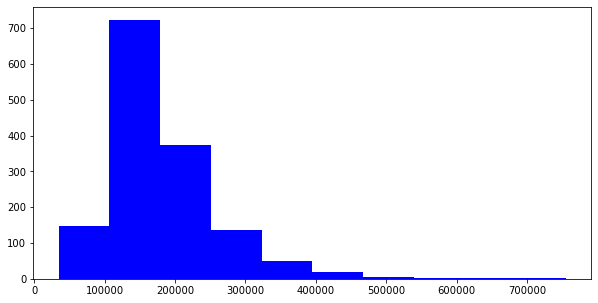

In [33]:
plt.figure(figsize=(10,5))
plt.hist(y,facecolor="blue")
plt.show()

In [34]:
PromedioInicial=np.mean(y)
MedianaInicial=np.median(y)
print(f'Promedio Incial: {PromedioInicial} y mediana incial: {MedianaInicial}')

Promedio Incial: 180921.19589041095 y mediana incial: 163000.0


### **Test Noramlidad**

**Gráfica Q-Q**
Gráfico Q-Q Los gráficos de cuantiles teóricos (Gráficos Q-Q). Estos gráficos comparan los cuantiles de la distribución observada con los cuantiles teóricos de una distribución normal con la misma media y desviación estándar que los datos. Cuanto más se aproximen los datos a una normal, más alineados están los puntos entorno a la rec

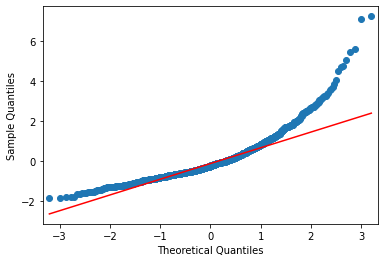

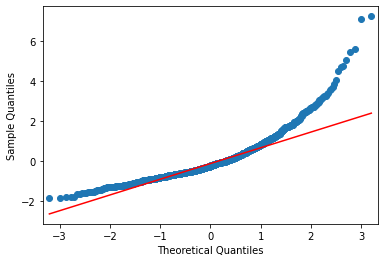

In [35]:
sms.qqplot(y,fit=True,line="q")

### **Test Estadistico de Normalidad**

**Métodos Analíticos**
Una prueba de hipótesis es una regla que especifica si se puede aceptar o rechazar una afirmación acerca de una población dependiendo de la evidencia proporcionada por una muestra de datos.

Un punto de decisión importante al trabajar con una muestra de datos es si utilizar métodos estadísticos paramétricos o no paramétricos. Los métodos estadísticos paramétricos asumen que los datos tienen una distribución conocida y específica, a menudo una distribución gaussiana. Si una muestra de datos no es gaussiana, entonces se violan los supuestos de las pruebas estadísticas paramétricas y deben usarse métodos estadísticos no paramétricos.

**Interpretación de una prueba**
* H0: PriceHouse proviene de una distribucción Normal
* Ha: PriceHouse No proviene de una distribucción Normal

p valor;

* p <= alfa : rechazar H0, no es normal.
* p> alpha : No rechazar H0, No significa que sea cierta normalidad, Significa que es muy probable que sea Normal

In [36]:
stat,pvalue= stats.normaltest(y)
print(pvalue)

if (pvalue <=0.05):
    print("Price House no es normal")
else:
    print("PriceHouse es probable que sea Normal")

2.283848353787728e-133
Price House no es normal


## **Normalidad puede estar afectada por Datos Atipicos**

**Detectar Datos Atípicos Univariado**

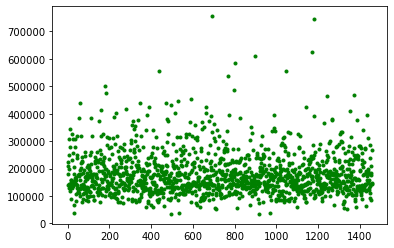

In [37]:
plt.plot(y,".",color="green");

### **Boxplot**

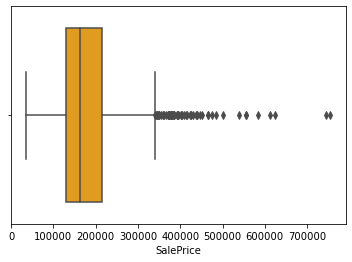

In [38]:
sns.boxplot(y,color="orange");

In [39]:
q1,q3=np.percentile(y,[25,75])

In [40]:
Rango=q3-q1

In [41]:
Rango

84025.0

In [42]:
LimiteSuperior= q3+1.5*Rango
LimiteSuperior

340037.5

In [43]:
LimiteInferior= q1-1.5*Rango
LimiteInferior

3937.5

''

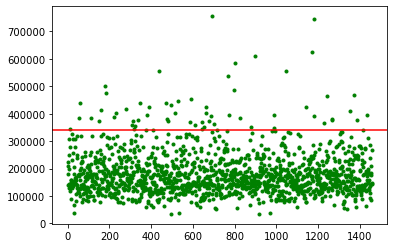

In [44]:
plt.plot(y,".",color="green")
plt.axhline(y=LimiteSuperior,color="red")
;

## **Filtramos Casas Atipícas**

In [45]:
HouseAtipicasPrice=df1[df1.SalePrice >=LimiteSuperior]

In [46]:
(len(HouseAtipicasPrice)/len(df))*100

4.178082191780822

In [47]:
HouseAtipicasPrice.SalePrice.describe()

count       61.000
mean    425954.180
std      89557.256
min     341000.000
25%     372500.000
50%     394617.000
75%     440000.000
max     755000.000
Name: SalePrice, dtype: float64

## **Casas Sin Atipicos**

In [48]:
HouseNoAtipicas=df1[df1.SalePrice <LimiteSuperior]

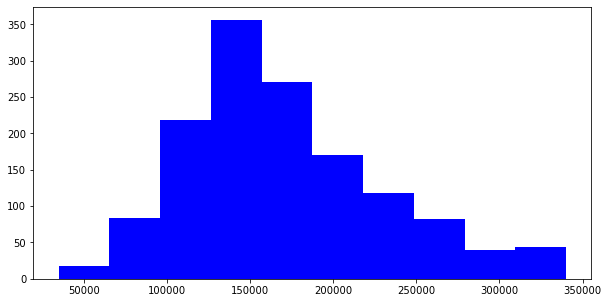

In [49]:
plt.figure(figsize=(10,5))
plt.hist(HouseNoAtipicas.SalePrice,facecolor="blue")
plt.show()

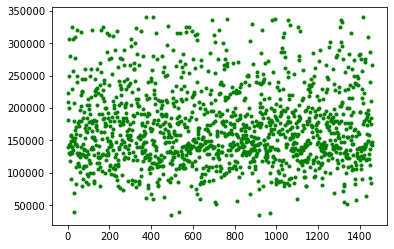

In [50]:
plt.plot(HouseNoAtipicas.SalePrice,".",color="green");

In [51]:
print(f'Promedio Incial: {PromedioInicial} y mediana incial: {MedianaInicial}')

Promedio Incial: 180921.19589041095 y mediana incial: 163000.0


In [52]:
Promedio2=np.mean(HouseNoAtipicas.SalePrice)
Mediana2=np.median(HouseNoAtipicas.SalePrice)
print(f'Promedio 2: {Promedio2} y mediana 2: {Mediana2}')

Promedio 2: 170237.12723373837 y mediana 2: 159500.0


In [53]:
stat,pvalue= stats.normaltest(HouseNoAtipicas.SalePrice)
print(pvalue)

if (pvalue <=0.05):
    print("Price House no es normal")
else:
    print("PriceHouse es probable que sea Normal")

1.8962885639433676e-20
Price House no es normal


# **Asumir por TLC que la variable es Normal y Aplicar un test de promedio**

* Promedio de precio es 170237
* Pormedio es diferente de 170237

* Si p valor de la prueba es mayor a 0.05, NO podemos rechazar la H0

In [54]:
stats.ttest_1samp(a=df1.SalePrice,popmean=Promedio2)

Ttest_1sampResult(statistic=5.13878182769778, pvalue=3.1394116468208287e-07)

In [55]:
from statsmodels.stats.weightstats import DescrStatsW

In [56]:
d1=DescrStatsW(df1.SalePrice)

In [57]:
print(d1.tconfint_mean(alpha=0.05, alternative='two-sided'))

(176842.84104108496, 184999.55073973694)


## **Consecuencias de la falta de normalidad**


El hecho de no poder asumir la normalidad influye principalmente en los test de hipótesis paramétricos (t-test, anova,…) y en los modelos de regresión. Las principales consecuencias de la falta de normalidad son:

Los estimadores mínimo-cuadráticos no son eficientes (de mínima varianza).

Los intervalos de confianza de los parámetros del modelo y los contrastes de significancia son solamente aproximados y no exactos.

Los test estadísticos expuestos requieren que la población de la que procede la muestra tenga una distribución normal, no la muestra en sí. Si la muestra se distribuye de forma normal, se puede aceptar que así lo hace la población de origen. En el caso de que la muestra no se distribuya de forma normal pero se tenga certeza de que la población de origen sí lo hace, entonces, puede estar justificado aceptar los resultados obtenidos por los contrastes paramétricos como válidos.

## **Teorema del Limite Central**

El teorema del límite central es un teorema fundamental de probabilidad y estadística. El teorema describe la distribución de la media de una muestra aleatoria proveniente de una población con varianza finita. Cuando el tamaño de la muestra es lo suficientemente grande, la distribución de las medias sigue aproximadamente una distribución normal.

## **Inferencia de Promedio Por Remuestreo**

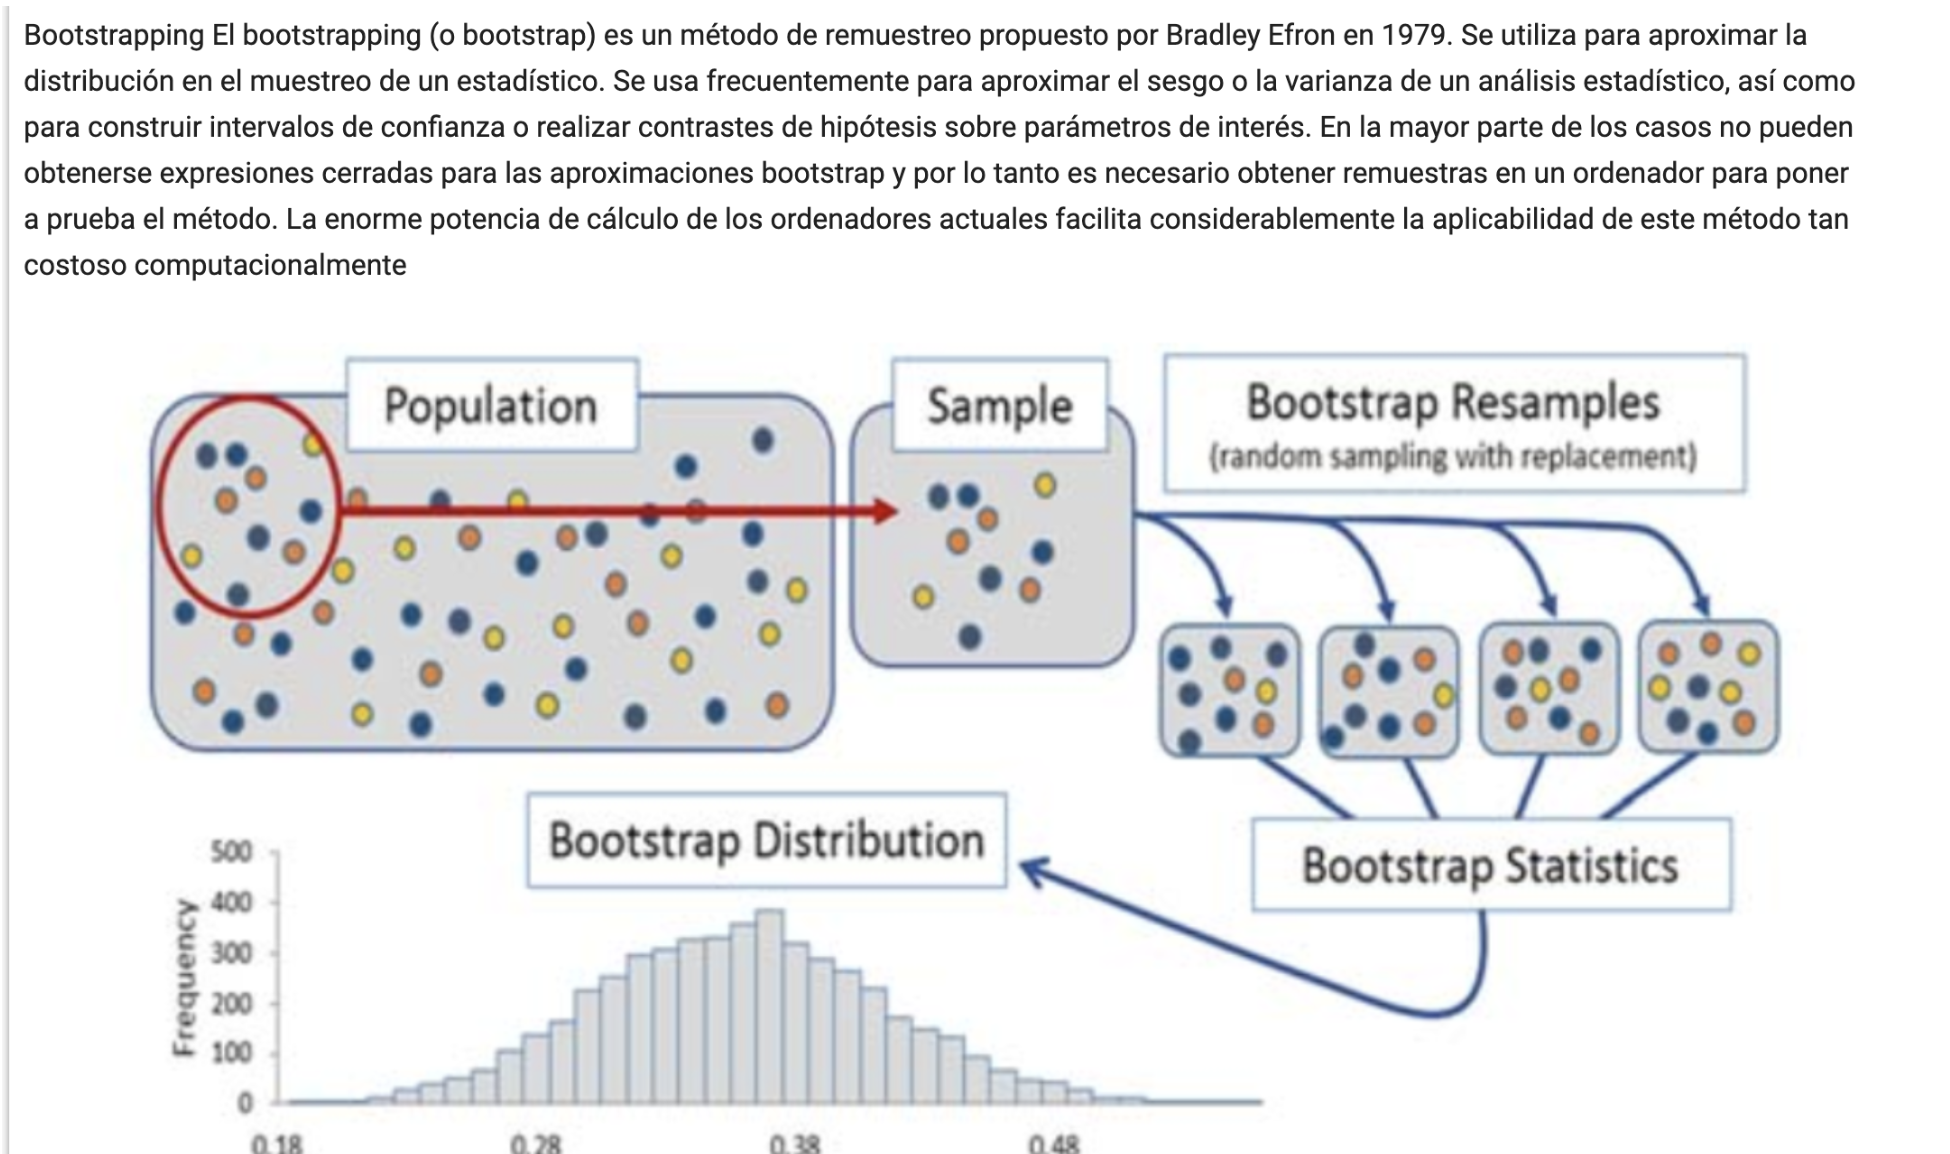

## **Definamos nuestros Estadisticos**

In [58]:
len(df1)

1460

In [59]:
def CalculoMedia(x):
    estadistico=np.mean(x)
    return estadistico

In [60]:
def CalculoMediana(x):
    estadistico=np.median(x)
    return estadistico

In [61]:
def boostraping(x,fun_estasdistico,n_iteraciones=10000,Mu=1000):
    n=Mu
    dist_boot=np.full(shape=n_iteraciones,fill_value=np.nan) # se crea el vector
    for i in tqdm(range(n_iteraciones)):
        resample=np.random.choice(x,size=n,replace=True)
        dist_boot[i]=fun_estasdistico(resample)
    return dist_boot 

In [62]:
Promedio_Boostraping=boostraping(df1.SalePrice,
                                 fun_estasdistico=CalculoMedia,
                                 n_iteraciones=5000,
                                 Mu=1000)

100%|████████████████████████████████████| 5000/5000 [00:00<00:00, 15222.60it/s]


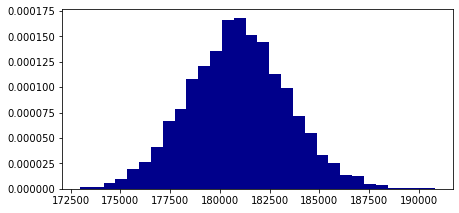

In [63]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,3.3))
ax.hist(Promedio_Boostraping,bins=30, density=True,color="darkblue")
plt.show()

In [64]:
Promedio_Boostraping=np.mean(Promedio_Boostraping)

In [65]:
Promedio_Boostraping #

180920.8857088

In [66]:
PromedioInicial # TLC

180921.19589041095

## **Intervalo Teórico**

In [67]:
d1=DescrStatsW(df1.SalePrice) # Asume normalidad

In [68]:
print(d1.tconfint_mean(alpha=0.05,alternative="two-sided"))

(176842.84104108496, 184999.55073973694)


## **Boostraping para Intervalo de Confianza**

In [69]:
## Funcion del Boostraping
def boostraping_IC_Empirico(x,fun_estadistico,n_iteraciones=5000,Mu=1000):
    n=Mu
    EstadisticoMuestra=fun_estadistico(x) 
    dist_boost=np.full(shape=n_iteraciones,fill_value=np.nan) # Se crea un vector del 5000 Iteraciones
    
    for i in tqdm(range(n_iteraciones)):
        resample=np.random.choice(x,size=n,replace=True)
        dist_boost[i]=fun_estadistico(resample)- EstadisticoMuestra
    return dist_boost

In [70]:
Distribuccion_Promedio_Boostraping_Diferencia=boostraping_IC_Empirico(x=df1.SalePrice,fun_estadistico=CalculoMedia,
                                                                      n_iteraciones=50000,Mu=1000)

100%|██████████████████████████████████| 50000/50000 [00:02<00:00, 18107.03it/s]


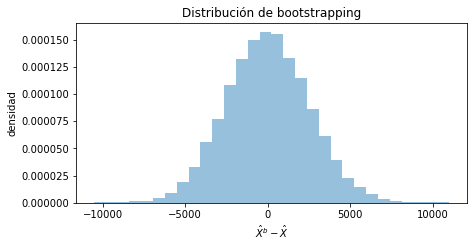

In [71]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,3.3))
ax.hist(Distribuccion_Promedio_Boostraping_Diferencia, bins=30, density=True, color='#3182bd', alpha=0.5)
ax.set_title('Distribución de bootstrapping')
ax.set_xlabel(r'$\hat{X}^{b} - \hat{X}$')
ax.set_ylabel('densidad');

La distribución obtenida por bootstrapping es una aproximación de la diferencia que cabe esperar entre el valor del estadístico calculado con los datos de la muestra disponible y el verdadero valor del parámetro poblacional

In [72]:
cuantiles=np.quantile(a=Distribuccion_Promedio_Boostraping_Diferencia,q=[0.025,0.975])
EstadisticoMuestra=CalculoMedia(df.SalePrice) 

In [73]:
intervalo = [EstadisticoMuestra - cuantiles[1] , EstadisticoMuestra - cuantiles[0]]
print(intervalo) 

[175936.9678308219, 185749.1071058219]


# **6) Análisis de Correlación entre Features**

## **Corrrelación Numérica Vs Numérica, Pearson**
Correlación de Pearson

La correlación de Pearson mide la dependencia lineal entre dos variables X e Y.

El coeficiente resultante es un valor entre -1 y 1 inclusive, donde:

* 1: correlación lineal positiva total.
* 0: Sin correlación lineal, las dos variables probablemente no se afectan entre sí.
* -1: correlación lineal negativa total

In [74]:
VariablesNumericas=df1.drop(columns=['SalePrice'])._get_numeric_data().columns.to_list()
print(VariablesNumericas)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']


## **Scatterplot**

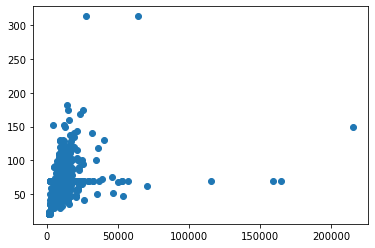

In [75]:
plt.scatter(df1.LotArea,df1.LotFrontage);

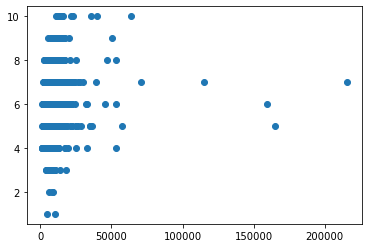

In [76]:
plt.scatter(df1.LotArea,df1.OverallQual);

In [77]:
stats.pearsonr(df1.LotArea,df1.OverallQual)[0]

0.10580574175496413

* No estan correlacionadas

## **Matrix de Correlación de Pearson**

In [78]:
MatrixCorrelacion=df1[VariablesNumericas].corr()
MatrixCorrelacion

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
MSSubClass,1.000,-0.357,-0.140,0.033,-0.059,0.028,0.041,0.024,-0.070,-0.066,-0.141,-0.239,-0.252,0.308,0.046,0.075,-0.023,0.040,0.081,-0.099,-0.013,-0.006,-0.012,-0.044,-0.026,0.008,-0.008,-0.014
LotFrontage,-0.357,1.000,0.305,0.235,-0.053,0.117,0.083,0.178,0.214,0.042,0.124,0.363,0.414,0.072,0.037,0.368,0.237,0.321,0.063,0.324,0.076,0.137,0.010,0.062,0.038,0.181,-0.000,0.010
LotArea,-0.140,0.305,1.000,0.106,-0.006,0.014,0.014,0.103,0.214,0.111,-0.003,0.261,0.299,0.051,0.005,0.263,0.120,0.190,-0.026,0.180,0.172,0.085,-0.018,0.020,0.043,0.078,0.038,0.001
OverallQual,0.033,0.235,0.106,1.000,-0.092,0.572,0.551,0.407,0.240,-0.059,0.308,0.538,0.476,0.295,-0.030,0.593,0.102,0.427,0.514,0.562,0.239,0.309,-0.114,0.030,0.065,0.065,-0.031,0.071
OverallCond,-0.059,-0.053,-0.006,-0.092,1.000,-0.376,0.074,-0.126,-0.046,0.040,-0.137,-0.171,-0.144,0.029,0.025,-0.080,0.013,-0.058,-0.306,-0.152,-0.003,-0.033,0.070,0.026,0.055,-0.002,0.069,-0.004
YearBuilt,0.028,0.117,0.014,0.572,-0.376,1.000,0.593,0.312,0.250,-0.049,0.149,0.391,0.282,0.010,-0.184,0.199,-0.071,0.096,0.777,0.479,0.225,0.189,-0.387,0.031,-0.050,0.005,-0.034,0.012
YearRemodAdd,0.041,0.083,0.014,0.551,0.074,0.593,1.000,0.177,0.128,-0.068,0.181,0.291,0.240,0.140,-0.062,0.287,-0.041,0.192,0.616,0.372,0.206,0.226,-0.194,0.045,-0.039,0.006,-0.010,0.021
MasVnrArea,0.024,0.178,0.103,0.407,-0.126,0.312,0.177,1.000,0.261,-0.071,0.114,0.360,0.340,0.174,-0.069,0.388,0.103,0.280,0.244,0.371,0.160,0.123,-0.110,0.019,0.062,0.012,-0.030,-0.007
BsmtFinSF1,-0.070,0.214,0.214,0.240,-0.046,0.250,0.128,0.261,1.000,-0.050,-0.495,0.522,0.446,-0.137,-0.065,0.208,-0.107,0.044,0.149,0.297,0.204,0.112,-0.102,0.026,0.062,0.140,0.004,-0.016
BsmtFinSF2,-0.066,0.042,0.111,-0.059,0.040,-0.049,-0.068,-0.071,-0.050,1.000,-0.209,0.105,0.097,-0.099,0.015,-0.010,-0.016,-0.035,-0.088,-0.018,0.068,0.003,0.037,-0.030,0.089,0.042,0.005,-0.015


## **Gráfica de MapaCalor**

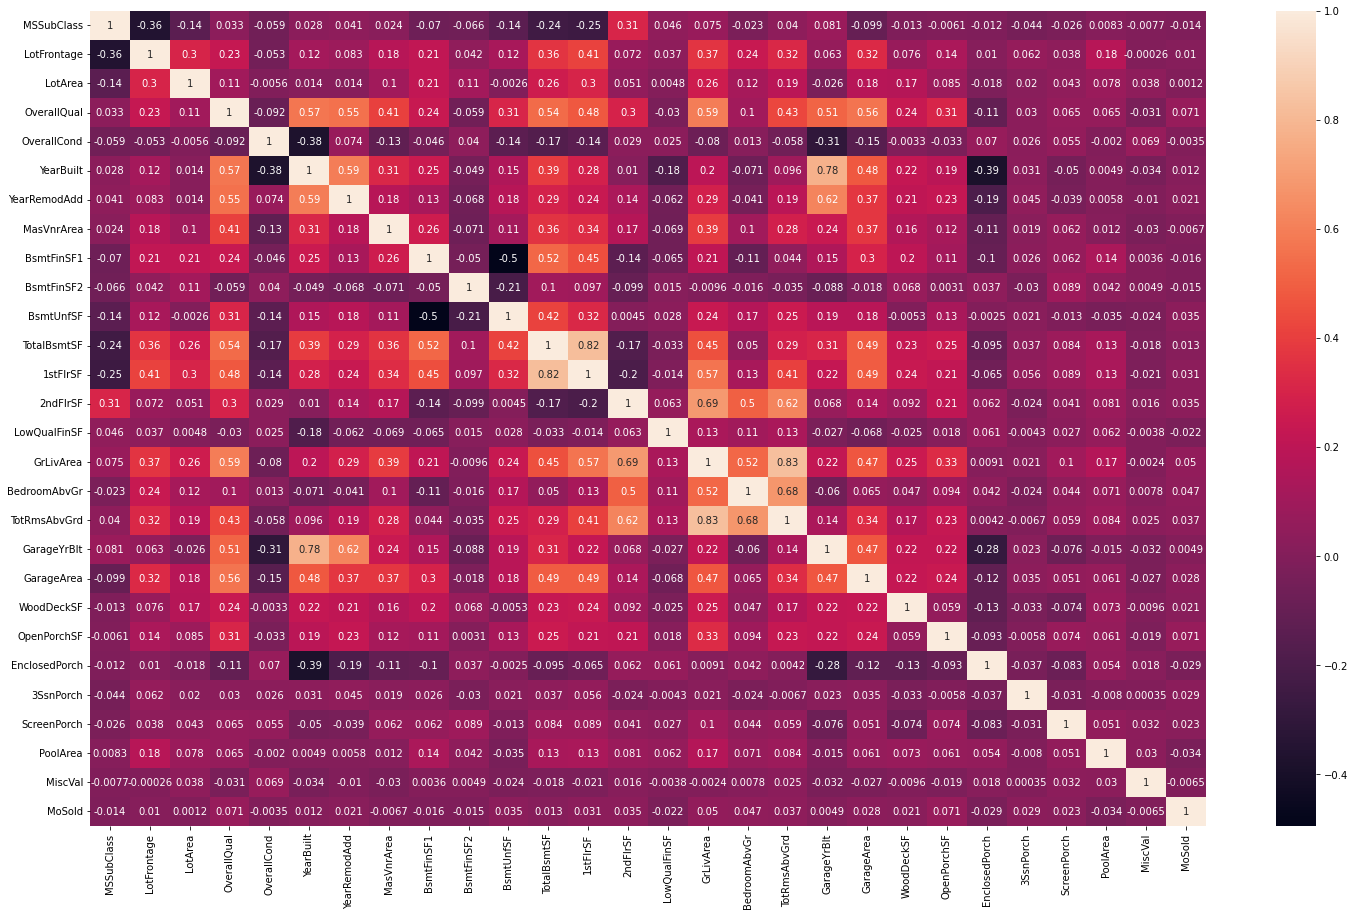

In [79]:
fig, ax=plt.subplots(figsize=(25,15))
sns.heatmap(MatrixCorrelacion,annot=True);

In [80]:
df2=utils.remove_collinear_features(df1[VariablesNumericas],0.75)

1stFlrSF | TotalBsmtSF | 0.82
TotRmsAbvGrd | GrLivArea | 0.83
GarageYrBlt | YearBuilt | 0.78


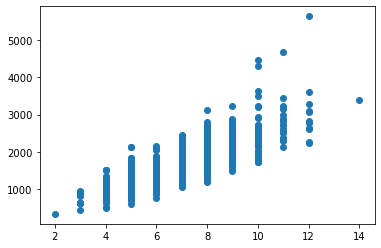

In [81]:
plt.scatter(df1.TotRmsAbvGrd,df1.GrLivArea);

In [82]:
VariablesNumericas_X=df2.columns.tolist()

In [83]:
len(VariablesNumericas_X)

25

In [84]:
len(VariablesNumericas)

28

## **Corrrelación Categoricas Vs Categoricas: CHI2**

**Test chi2 de independencia**

* H0: Las variables son Independientes
* Ha: las Variables son dependientes

* Si p valor es menor a 0,05, las variables estan relacionadas estadististicamente

In [85]:
df1[cat_cols]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,YrSold,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,1,Gd,Typ,0,Gd,Attchd,RFn,2,TA,TA,Y,2008,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,1,TA,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,2007,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,1,Gd,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,2008,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,1,0,1,0,1,Gd,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,2006,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,1,Gd,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,0,0,2,1,1,TA,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,2007,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,1,0,2,0,1,TA,Min1,2,TA,Attchd,Unf,2,TA,TA,Y,2010,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0,0,2,0,1,Gd,Typ,2,Gd,Attchd,RFn,1,TA,TA,Y,2010,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,1,0,1,0,1,Gd,Typ,0,Gd,Attchd,Unf,1,TA,TA,Y,2010,WD,Normal


In [86]:
df1.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [87]:
df1.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [88]:
tc=pd.crosstab(index=df1.MSZoning,columns=df1.LotConfig)
tc

LotConfig,Corner,CulDSac,FR2,FR3,Inside
MSZoning,,,,,
C (all),2,0,0,0,8
FV,7,1,3,1,53
RH,2,0,0,0,14
RL,214,93,39,1,804
RM,38,0,5,2,173


In [89]:
stats.chi2_contingency(tc)[1]

0.0008462386541660305

In [90]:
#cat_cols

* Las Variables estan relaciondas, se debe incluir solo una

In [91]:
from itertools import combinations,permutations

In [92]:
lista=["a","b","c"]
ListaCombinada=list()

-aa
-ab
-ac
-bc
-bb
-cc
-ba
-ca

In [93]:
for n in range(len(lista)):
    ListaCombinada += list(combinations(lista,2))

In [94]:
ListaCombinada 

[('a', 'b'),
 ('a', 'c'),
 ('b', 'c'),
 ('a', 'b'),
 ('a', 'c'),
 ('b', 'c'),
 ('a', 'b'),
 ('a', 'c'),
 ('b', 'c')]